In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import pickle as pkl

(60000, 2) (140000, 2)
0.3 0.7


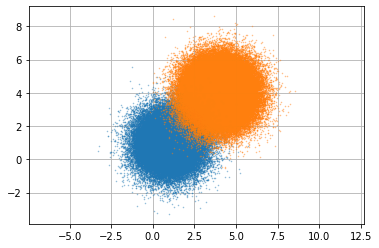

[[1 1]
 [4 4]] [[[1 0]
  [0 1]]

 [[4 0]
  [0 8]]] [0.3 0.7] [-0.26141452  1.98797281]


In [2]:
mean1 = [1,1]
cov1 = [[1,0],[0,1]]
mean2 = [4,4]
cov2 = [[4,0],[0,8]]
try:
    with open('q1.pickle', 'rb') as handle:
        b = pkl.load(handle)
        X,y=b
except:
    data1 = np.random.multivariate_normal(mean1, cov1, 60000)
    y1 = np.zeros(60000)
    data2 = np.random.multivariate_normal(mean2, cov2, 140000)
    y2 = np.ones(140000)
    X =np.vstack((data1,data2))
    y =np.hstack((y1,y2))
    with open('q1.pickle', 'wb') as handle:
        pkl.dump([X,y], handle, protocol=pkl.HIGHEST_PROTOCOL)

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
prior1 = len(Xy0) / len(X)
prior2 = len(Xy1) / len(X)
print(prior1, prior2)
### code for plotting
plt.plot(Xy0[:, 0], Xy0[:, 1], '.', alpha=0.5, markersize=1)
plt.plot(Xy1[:, 0], Xy1[:, 1], '.', alpha=0.5, markersize=1)
plt.axis('equal')
plt.grid()
plt.show()

mus=np.array([mean1,mean2])
sigmas=np.array([cov1,cov2])
priors=np.array([prior1,prior2])
print(mus,sigmas,priors,X[100])

In [28]:
class euclidean_2d_classifier:
    def __init__(self):
        print("Object Created")
        self.center1=[np.random.uniform(0,1),np.random.uniform(0,1)]
        self.center2=[np.random.uniform(0,1),np.random.uniform(0,1)]
    def train(self,xes,y):
        print("Training")
        cluster1=np.array([xes[i] for i in range(len(xes)) if y[i]==0])
        cluster2=np.array([xes[i] for i in range(len(xes)) if y[i]==1])
        self.center1=[np.mean(ax) for ax in cluster1.T]
        self.center2=[np.mean(ax) for ax in cluster2.T]
        print(self.center1,self.center2)
    def predict_1(self,X):
        dist1=np.linalg.norm(X-self.center1)
        dist2=np.linalg.norm(X-self.center2)
        if dist1>dist2:
            return 1
        else:
            return 0
        
    def predict(self,X):
        print(len(X))
        ret_data=np.array([self.predict_1(x) for x in X])
        print(len(ret_data))
        return ret_data

In [29]:
classifier=euclidean_2d_classifier()
classifier.train(X,y)
y_pred=classifier.predict(X)
y_pred

Object Created
Training
[1.0008500890165442, 1.0038002971548732] [3.999058943262743, 4.000330357387837]
200000
200000


array([0, 0, 0, ..., 1, 1, 1])

shape of x_in, (1000000, 2)
1000000
1000000
doing binary classifcation...


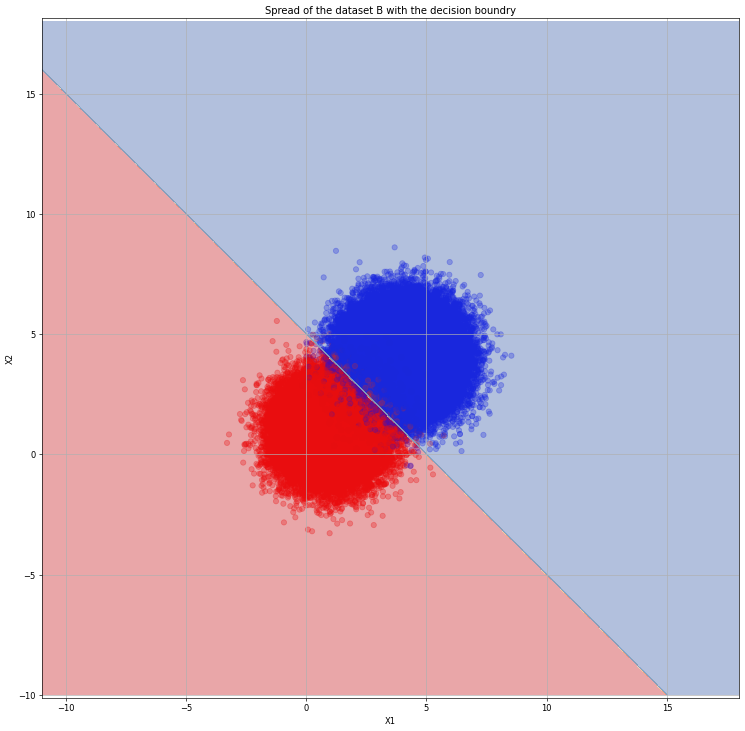

In [34]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = -11,18
    y_min, y_max = -10,18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions using the trained model
    print(f"shape of x_in, {x_in.shape}")
    y_pred = model.predict(x_in)
    y_pred=[[x] for x in y_pred]
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary
    plt.figure(figsize=(15,15), dpi=60)
    p=np.concatenate((X.T,np.array([y])),axis=0).T
    np.random.shuffle(p)
    color= ['red' if l == 0 else 'blue' for l in p[:,2]]
    plt.scatter(p[:, 0], p[:, 1], s=40, color=color, alpha=0.3)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.4)
#     plt.scatter([1],[1], s=20, color=["green"], alpha=1)
#     plt.scatter([4],[4], s=20, color=["yellow"], alpha=1)
    plt.axis('equal')
    plt.title("Spread of the dataset B with the decision boundry")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid()
    
plot_decision_boundary(classifier,X,y)

In [32]:
def misclf_rate(y_true, y_pred):
    y_true=list(y_true)
    y_pred=list(y_pred)
    total_class1 = y_true.count(0)
    total_class2 = y_true.count(1)
    misclf_class1 = 0
    misclf_class2 = 0    
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()    
    total_misclassification_rate = (fp+fn)/(tn+fp+fn+tp)   
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 0:
                misclf_class1 += 1
            elif y_true[i] == 1:
                misclf_class2 += 1   
            
    class1_misclf_rate = misclf_class1/total_class1
    class2_misclf_rate = misclf_class2/total_class2    
    return class1_misclf_rate,class2_misclf_rate,total_misclassification_rate

c1_mis,c2_mis,tot_mis=misclf_rate(y,y_pred)

In [33]:
c1_mis,c2_mis,tot_mis

(0.016866666666666665, 0.017635714285714286, 0.017405)